Name: Yash Satra

Roll No: 1811109

### Importing packages

In [1]:
import pandas as pd
import numpy as np

### Importing dataset

In [2]:
df = pd.read_csv('./datasets/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 14)

The target column is the label

1 - Person has heart disease
0 - Person doesn't have heart disease 

### Checking if there are any null values in any column

In [5]:
num_of_vull_vals = []
for cols in df.columns[1:-1]:
    num_of_vull_vals.append(df[cols].isnull().sum())
print(num_of_vull_vals)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


There are no null values

### Separating features and label

In [6]:
x = df.loc[:, 'age':'thal'].values
print(x)

y = df['target'].values
print(y)

[[63.  1.  3. ...  0.  0.  1.]
 [37.  1.  2. ...  0.  0.  2.]
 [41.  0.  1. ...  2.  0.  2.]
 ...
 [68.  1.  0. ...  1.  2.  3.]
 [57.  1.  0. ...  1.  1.  3.]
 [57.  0.  1. ...  1.  1.  2.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


### Splitting training and testing data

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [9]:
y_pred_test = classifier.predict(x_test)

In [10]:
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


### Finding accuracy for testing data

In [11]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy:  0.8289473684210527
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        33
           1       0.81      0.91      0.86        43

    accuracy                           0.83        76
   macro avg       0.83      0.82      0.82        76
weighted avg       0.83      0.83      0.83        76



### Finding accuracy for training data

In [12]:
y_pred_train = classifier.predict(x_train)
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Accuracy:  0.8546255506607929
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       105
           1       0.84      0.89      0.87       122

    accuracy                           0.85       227
   macro avg       0.86      0.85      0.85       227
weighted avg       0.86      0.85      0.85       227



### Interpretation:
The accuracy is only slightly more for the train data. Hence there is no overfitting.

## Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier(random_state = 0)
cl.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
y_pred_test = cl.predict(x_test)

In [15]:
print(np.concatenate((y_pred_test.reshape(len(y_pred_test),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]]


### Finding accuracy for testing data

In [16]:
print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy:  0.7894736842105263
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        33
           1       0.80      0.84      0.82        43

    accuracy                           0.79        76
   macro avg       0.79      0.78      0.78        76
weighted avg       0.79      0.79      0.79        76



### Finding accuracy for training data

In [17]:
y_pred_train = cl.predict(x_train)
print('Accuracy: ', accuracy_score(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

Accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       122

    accuracy                           1.00       227
   macro avg       1.00      1.00      1.00       227
weighted avg       1.00      1.00      1.00       227



### Interpretation:
The accuracy is comparitively large for the train data. Hence there is overfitting.

### Plotting decision tree

[Text(160.425, 195.696, 'X[2] <= 0.5\ngini = 0.497\nsamples = 227\nvalue = [105, 122]'), Text(90.67500000000001, 152.208, 'X[11] <= 0.5\ngini = 0.397\nsamples = 110\nvalue = [80, 30]'), Text(55.800000000000004, 108.72, 'X[12] <= 2.5\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'), Text(27.900000000000002, 65.232, 'X[7] <= 119.5\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'), Text(13.950000000000001, 21.744, '\n  (...)  \n'), Text(41.85, 21.744, '\n  (...)  \n'), Text(83.7, 65.232, 'X[9] <= 0.6\ngini = 0.32\nsamples = 20\nvalue = [16, 4]'), Text(69.75, 21.744, '\n  (...)  \n'), Text(97.65, 21.744, '\n  (...)  \n'), Text(125.55000000000001, 108.72, 'X[0] <= 63.5\ngini = 0.095\nsamples = 60\nvalue = [57, 3]'), Text(111.60000000000001, 65.232, 'gini = 0.0\nsamples = 45\nvalue = [45, 0]'), Text(139.5, 65.232, 'X[6] <= 0.5\ngini = 0.32\nsamples = 15\nvalue = [12, 3]'), Text(125.55000000000001, 21.744, '\n  (...)  \n'), Text(153.45000000000002, 21.744, '\n  (...)  \n'), Text(230.175, 152.208,

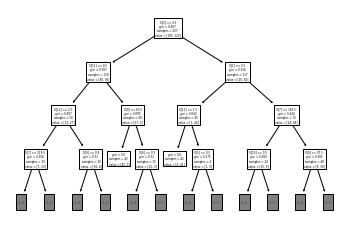

In [18]:
from sklearn import tree
print(tree.plot_tree(cl, max_depth = 3))  

In [19]:
# tree.export_graphviz
# tree_export_text  in python.
print(tree.export_graphviz(cl))

digraph Tree {
node [shape=box] ;
0 [label="X[2] <= 0.5\ngini = 0.497\nsamples = 227\nvalue = [105, 122]"] ;
1 [label="X[11] <= 0.5\ngini = 0.397\nsamples = 110\nvalue = [80, 30]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[12] <= 2.5\ngini = 0.497\nsamples = 50\nvalue = [23, 27]"] ;
1 -> 2 ;
3 [label="X[7] <= 119.5\ngini = 0.358\nsamples = 30\nvalue = [7, 23]"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
3 -> 4 ;
5 [label="X[12] <= 1.5\ngini = 0.293\nsamples = 28\nvalue = [5, 23]"] ;
3 -> 5 ;
6 [label="X[0] <= 54.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
6 -> 7 ;
8 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
6 -> 8 ;
9 [label="X[0] <= 60.0\ngini = 0.159\nsamples = 23\nvalue = [2, 21]"] ;
5 -> 9 ;
10 [label="gini = 0.0\nsamples = 16\nvalue = [0, 16]"] ;
9 -> 10 ;
11 [label="X[7] <= 166.0\ngini = 0.408\nsamples = 7\nvalue = [2, 5]"] ;
9 -> 11 ;
12 [label="X[

In [20]:
test = pd.read_csv('./datasets/CrashTest_TestData.csv')
train = pd.read_csv('./datasets/CrashTest_TrainData.csv')

In [22]:
train.head()

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,1,-5.27,-1.30,2.86,-4.85,4.04,SUV
1,2,-4.82,-5.38,9.72,-0.97,-4.57,Hatchback
2,3,9.57,-7.50,-7.61,1.33,-5.10,Hatchback
3,4,2.84,-2.85,0.92,5.51,-6.64,Hatchback
4,5,0.00,2.68,-4.15,0.85,5.58,SUV


In [23]:
test['CarType'].value_counts()

SUV          10
Hatchback    10
Name: CarType, dtype: int64

In [24]:
train = train.dropna()

In [25]:
train.replace('SUV',1,inplace=True)
train.replace('Hatchback', 2, inplace=True)

In [26]:
train.head()

,CarID,ManHI,ManBI,IntI,HVACi,Safety,CarType
0,1,-5.27,-1.30,2.86,-4.85,4.04,1
1,2,-4.82,-5.38,9.72,-0.97,-4.57,2
2,3,9.57,-7.50,-7.61,1.33,-5.10,2
3,4,2.84,-2.85,0.92,5.51,-6.64,2
4,5,0.00,2.68,-4.15,0.85,5.58,1


In [27]:
test.replace('SUV',1,inplace=True)
test.replace('Hatchback', 2, inplace=True)

In [28]:
x_train = train.loc[:,'CarID':'Safety']
y_train = train['CarType']

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [30]:
x_test = test.loc[:,'CarID':'Safety']
y_test = test['CarType']

In [31]:
y_pred_test = classifier.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy:  0.7
              precision    recall  f1-score   support

           1       1.00      0.40      0.57        10
           2       0.62      1.00      0.77        10

    accuracy                           0.70        20
   macro avg       0.81      0.70      0.67        20
weighted avg       0.81      0.70      0.67        20



In [33]:
from sklearn.tree import DecisionTreeClassifier
cl = DecisionTreeClassifier(random_state = 0)
cl.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [34]:
y_pred_test = cl.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Accuracy:  0.85
              precision    recall  f1-score   support

           1       1.00      0.70      0.82        10
           2       0.77      1.00      0.87        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20

